## IMDB Movie Dataset data analysis

dataset : https://www.kaggle.com/PromptCloudHQ/imdb-data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('IMDB-Movie-Data.csv')

#### Display Top 10 Rows of The Dataset

In [6]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


#### Check Last 10 Rows of The Dataset

In [7]:
data.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


#### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [8]:
data.shape

(1000, 12)

#### Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And     Memory Requirement

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


#### Check Missing Values In The Dataset

In [10]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

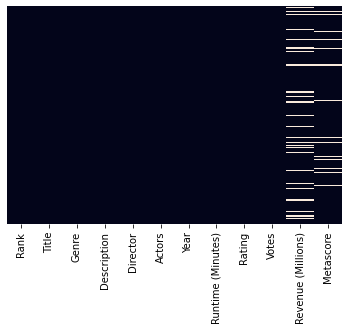

In [11]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False)

In [12]:
percentage_missing = data.isnull().sum()*100/len(data)
percentage_missing

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [13]:
data.isnull().mean()

Rank                  0.000
Title                 0.000
Genre                 0.000
Description           0.000
Director              0.000
Actors                0.000
Year                  0.000
Runtime (Minutes)     0.000
Rating                0.000
Votes                 0.000
Revenue (Millions)    0.128
Metascore             0.064
dtype: float64

#### Drop All The  Missing Values

In [14]:
data.dropna(axis=0, inplace = True)

#### Check For Duplicate Data

In [15]:
duplicate_data = data.duplicated().any()
duplicate_data

False

#### Get Overall Statistics About The DataFrame

In [16]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


#### Display Title of The Movie Having Runtime Greater Than or equal to 180 Minutes

In [17]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [18]:
data[data['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

#### In Which Year There Was The Highest Average Voting?

In [19]:
data.groupby('Year')['Votes'].mean().sort_values(ascending = False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

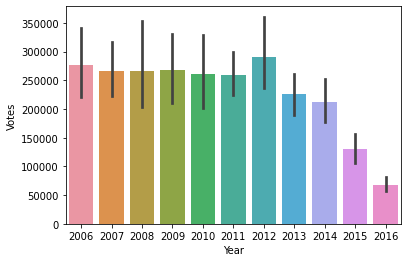

In [20]:
sns.barplot(x =  'Year', y = 'Votes', data = data)

#### In Which Year There Was The Highest Average Revenue?

In [21]:
data.groupby('Year')['Revenue (Millions)'].max().sort_values(ascending = False)

Year
2015    936.63
2009    760.51
2012    623.28
2008    533.32
2016    532.17
2013    424.65
2006    423.03
2010    414.98
2011    380.96
2014    350.12
2007    336.53
Name: Revenue (Millions), dtype: float64

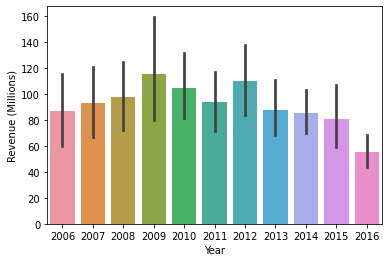

In [22]:
sns.barplot(x =  'Year', y = 'Revenue (Millions)', data = data)

#### Find The Average Rating For Each Director

In [23]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [24]:
data.groupby('Director')['Rating'].mean().sort_values(ascending = False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Aamir Khan                          8.50
Florian Henckel von Donnersmarck    8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

#### Display Top 10 Lengthy Movies Title and Runtime

In [25]:
top10_len = data.nlargest(10, 'Runtime (Minutes)')[['Title','Runtime (Minutes)']]\
.set_index('Title')
top10_len

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


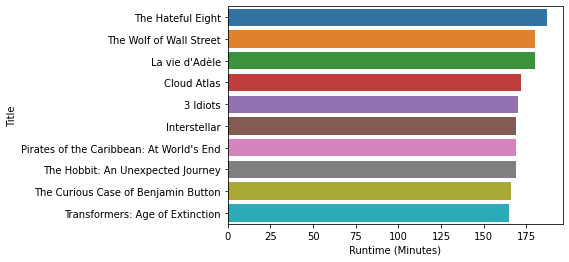

In [26]:
sns.barplot(x='Runtime (Minutes)', y=top10_len.index, data=top10_len)

#### Display Number of Movies Per Year

In [27]:
data['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


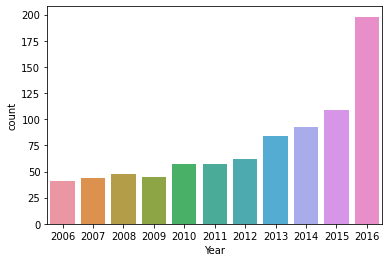

In [28]:
sns.countplot(data['Year'])

#### Find Most Popular Movie Title (Highest Revenue)

In [29]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [30]:
data[data['Revenue (Millions)']==data['Revenue (Millions)'].max()]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

#### Display Top 10 Highest Rated Movie Titles And its Directors

In [31]:
top10_len = data.nlargest(10, 'Rating')[['Title','Rating','Director']]\
.set_index('Title')
top10_len

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


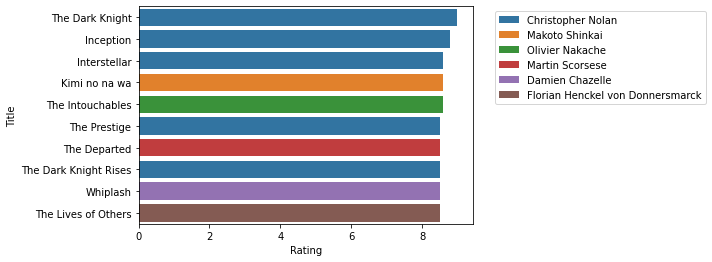

In [32]:
sns.barplot(x='Rating', y = top10_len.index, data = top10_len, hue = 'Director', dodge = False)
plt.legend(bbox_to_anchor=(1.05,1), loc = 2)

#### Display Top 10 Highest Revenue Movie Titles

In [33]:
top10_len = data.nlargest(10, 'Revenue (Millions)')[['Title','Revenue (Millions)']]\
.set_index('Title')
top10_len

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


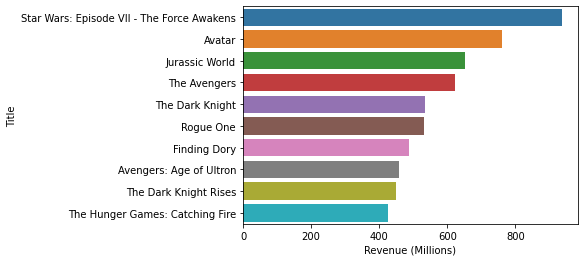

In [34]:
sns.barplot(x = 'Revenue (Millions)', y = top10_len.index, data = top10_len)

#### Find Average Rating of Movies Year Wise

In [35]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [36]:
data.groupby('Year')['Rating'].mean().sort_values(ascending = True)

Year
2016    6.644444
2015    6.674312
2008    6.708333
2014    6.822581
2013    6.832143
2010    6.894737
2009    6.911111
2012    6.933871
2011    6.945614
2007    7.140909
2006    7.143902
Name: Rating, dtype: float64

#### Does Rating Affect The Revenue?

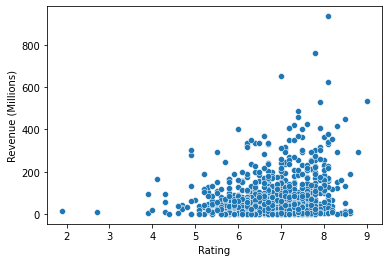

In [37]:
sns.scatterplot( x = 'Rating', y = 'Revenue (Millions)', data = data)

#### Classify Movies Based on Ratings [Excellent, Good, and Average]

In [38]:
def rating(rating):
    if rating<=7.0:
        return 'Excellent'
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

In [39]:
data['rating_cat'] = data['Rating'].apply(rating)

In [40]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Excellent


#### Count Number of Action Movies

In [41]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'rating_cat'],
      dtype='object')

In [42]:
data['Genre'].dtype

dtype('O')

In [43]:
len(data[data['Genre'].str.contains('Action', case = False)])

277

#### Find Unique Values From Genre

In [44]:
data['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
993     Action,Adventure,Horror
994                      Comedy
996                      Horror
997         Drama,Music,Romance
999       Comedy,Family,Fantasy
Name: Genre, Length: 838, dtype: object

In [45]:
list1 = []
for value in data['Genre']:
    list1.append(value.split(','))

In [46]:
list1

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Comedy'],
 ['Action', 'Horror', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi']

In [47]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [48]:
one_d

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [49]:
uni_list = []
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

In [50]:
len(uni_list)

20

#### How Many Films of Each Genre Were Made?

In [51]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [52]:
from collections import Counter

In [53]:
Counter(one_d)

Counter({'Action': 277,
         'Adventure': 244,
         'Animation': 45,
         'Biography': 67,
         'Comedy': 250,
         'Crime': 126,
         'Drama': 419,
         'Family': 48,
         'Fantasy': 92,
         'History': 25,
         'Horror': 87,
         'Music': 15,
         'Musical': 5,
         'Mystery': 86,
         'Romance': 120,
         'Sci-Fi': 107,
         'Sport': 15,
         'Thriller': 148,
         'War': 10,
         'Western': 4})